# tennis-chatbot

In [17]:
import pandas as pd
from sklearn import preprocessing
from sklearn import tree

In [18]:
weather = pd.read_csv('assets/weather-raw.csv').set_index('day')

In [19]:
weather

,outlook,temperature,humidity,windy,play
day,,,,,
1,overcast,hot,high,False,yes
2,overcast,cool,normal,True,yes
3,overcast,mild,high,True,yes
4,overcast,hot,normal,False,yes
5,rainy,mild,high,False,yes
6,rainy,cool,normal,False,yes
7,rainy,cool,normal,True,no
8,rainy,mild,normal,False,yes
9,rainy,mild,high,True,no


## Label encoding

In [20]:
for column in weather.columns:
    le = preprocessing.LabelEncoder()
    le.fit(weather[column])
    weather[column] = le.transform(weather[column])

In [21]:
weather

,outlook,temperature,humidity,windy,play
day,,,,,
1,0,1,0,0,1
2,0,0,1,1,1
3,0,2,0,1,1
4,0,1,1,0,1
5,1,2,0,0,1
6,1,0,1,0,1
7,1,0,1,1,0
8,1,2,1,0,1
9,1,2,0,1,0


## Decision tree

In [22]:
X = weather[['outlook', 'temperature', 'humidity', 'windy']]
y = weather['play']
model = tree.DecisionTreeClassifier().fit(X, y)

[Text(0.4, 0.9, 'x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'x[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'x[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'x[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

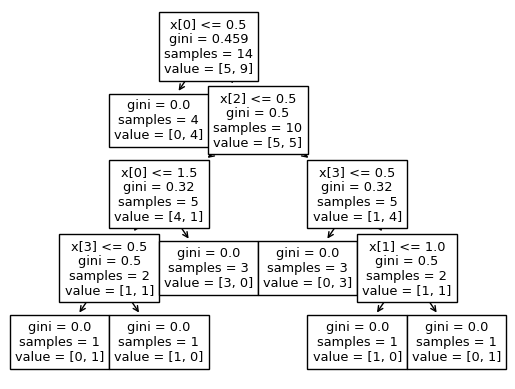

In [23]:
tree.plot_tree(model)

## Prediction

| Outlook | Temperature | Humidity | Windy |
| ------- | ----------- | -------- | ----- |
| Rainy   | Cool        | High     | True  |


In [24]:
user_input = pd.DataFrame([{"outlook": 1, "temperature": 1, "humidity": 0, "windy": 1}])
model.predict(user_input)


array([0])

The model predicts that the conditions are not appropriate to play tennis.